# Most dominant colors
---------------------
---------------------

1. get image using cv2
2. define number of clusters
3. Convert to RGB vector space


In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import cv2

(1200, 1920, 3)
(320, 480, 3)


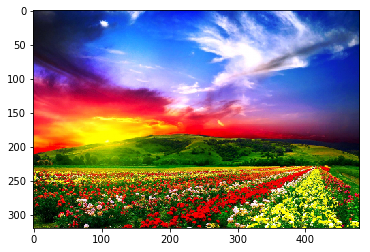

In [35]:
im = cv2.imread('/Users/apple/Desktop/perceptron/wall/xyz.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

print im.shape
img = cv2.resize(im,(480,320))
print img.shape
plt.imshow(img)
plt.show()

In [36]:
image_vector = img.reshape((img.shape[0]* img.shape[1]),img.shape[2])
print image_vector.shape

(153600, 3)


In [37]:
NC=10
from sklearn.cluster import KMeans
km = KMeans(n_clusters=NC)
km.fit(image_vector)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [38]:
colors=255 - km.cluster_centers_
print colors
print colors.dtype

[[ 212.26128915  203.2199563   111.79964797]
 [ 211.33112917  156.01400953  245.21961334]
 [ 207.99169794  146.62458774   23.68622768]
 [  53.535313    236.72157571  217.02762172]
 [ 109.07791516  108.78672425   26.088505  ]
 [  17.63259351   40.11937395  227.94331948]
 [ 232.1612525   218.0351342   234.41539998]
 [  35.49532236   45.52578142   11.62194503]
 [ 124.16636145  120.55759036  233.59122892]
 [  15.96560543  162.21492195  186.07646177]]
float64


(10, 3)
[[212 203 111]
 [211 156 245]
 [207 146  23]
 [ 53 236 217]
 [109 108  26]
 [ 17  40 227]
 [232 218 234]
 [ 35  45  11]
 [124 120 233]
 [ 15 162 186]]


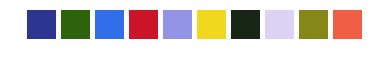

In [39]:
colors= colors.astype('uint8')
print colors.shape
print colors
plt.figure(0)
for cols in range(colors.shape[0]):
    cl = np.zeros((20, 20, 3))
    cl[:, :, :] = colors[cols]
    plt.subplot(1, NC, cols+1)
    plt.axis("off")
    plt.imshow(cl)
plt.show()

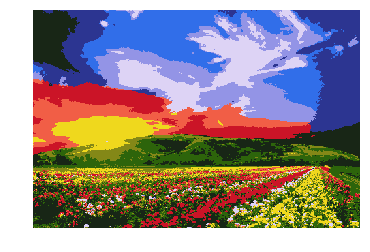

In [40]:
new_im = np.zeros((image_vector.shape))

for ix in range(new_im.shape[0]):
    new_im[ix, :] = colors[km.labels_[ix]]

new_im = new_im.reshape(img.shape)

plt.figure(0)
plt.axis("off")
plt.imshow(new_im)
plt.show()

In [41]:
dom_cols = np.unique(km.labels_, return_counts=True)
lab = dom_cols[0]
hist = dom_cols[1].astype("float")/dom_cols[1].sum()

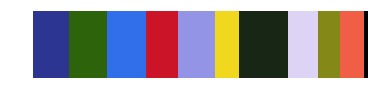

In [42]:
col_sp = np.zeros((100, 500, 3))

start = 0
for (col, percent) in zip(lab, hist):
    # print percent
    end = int(start + percent*col_sp.shape[1])
    # print end
    col_sp[:, start:end, :] = colors[col]
    start = end

plt.figure(0)
plt.axis("off")
plt.imshow(col_sp)

plt.show()